In [59]:
#pip install pandas openpyxl


In [134]:
df=pd.read_csv('hack.csv')
print(df.head(10))
df.info()

   Restaurant ID  Restaurant Name  Country Code  City  \
0        6317637             3750           162    74   
1        6304287             3174           162    74   
2        6300002             2899           162    76   
3        6318506             4708           162    76   
4        6314302             5524           162    76   
5       18189371             2074           162    76   
6        6300781             1008           162    95   
7        6301290             7180           162    95   
8        6300010             6046           162    95   
9        6314987             3813           162    96   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   
5  Ground Floor, Mega Fashion Hall, 

In [135]:
print(len(df['Restaurant Name']))
print(len(df['Locality Verbose']))
print(len(df['Address']))
print(len(df['Cuisines']))
print(len(df['Average Cost for two']))

9551
9551
9551
9551
9551


In [158]:
#df['Restaurant name'].unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Restaurant ID         9551 non-null   int64
 1   Restaurant Name       9551 non-null   int64
 2   Country Code          9551 non-null   int64
 3   City                  9551 non-null   int64
 4   Address               9551 non-null   int64
 5   Locality Verbose      9551 non-null   int64
 6   Cuisines              9551 non-null   int64
 7   Average Cost for two  9551 non-null   int64
 8   Has Table booking     9551 non-null   int64
 9   Has Online delivery   9551 non-null   int64
 10  Is delivering now     9551 non-null   int64
 11  Price range           9551 non-null   int64
 12  Votes                 9551 non-null   int64
dtypes: int64(13)
memory usage: 970.2 KB


In [159]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [160]:
label=LabelEncoder()
label

LabelEncoder()

In [161]:
df['Restaurant Name']=label.fit_transform(df['Restaurant Name'])


In [162]:
df['Locality Verbose']=label.fit_transform(df['Locality Verbose'])
df['Locality Verbose']

0       176
1       605
2       318
3       879
4       879
       ... 
9546    529
9547    554
9548    567
9549    567
9550    685
Name: Locality Verbose, Length: 9551, dtype: int64

In [163]:
df['Address']=label.fit_transform(df['Address'])

In [164]:
df['Cuisines']=label.fit_transform(df['Cuisines'])

In [165]:
df['Is delivering now']=label.fit_transform(df['Is delivering now'])

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Restaurant ID         9551 non-null   int64
 1   Restaurant Name       9551 non-null   int64
 2   Country Code          9551 non-null   int64
 3   City                  9551 non-null   int64
 4   Address               9551 non-null   int64
 5   Locality Verbose      9551 non-null   int64
 6   Cuisines              9551 non-null   int64
 7   Average Cost for two  9551 non-null   int64
 8   Has Table booking     9551 non-null   int64
 9   Has Online delivery   9551 non-null   int64
 10  Is delivering now     9551 non-null   int64
 11  Price range           9551 non-null   int64
 12  Votes                 9551 non-null   int64
dtypes: int64(13)
memory usage: 970.2 KB


In [173]:
df=df.drop('Restaurant ID',axis=1)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Restaurant Name       9551 non-null   int64
 1   Country Code          9551 non-null   int64
 2   City                  9551 non-null   int64
 3   Address               9551 non-null   int64
 4   Locality Verbose      9551 non-null   int64
 5   Cuisines              9551 non-null   int64
 6   Average Cost for two  9551 non-null   int64
 7   Has Table booking     9551 non-null   int64
 8   Has Online delivery   9551 non-null   int64
 9   Is delivering now     9551 non-null   int64
 10  Price range           9551 non-null   int64
 11  Votes                 9551 non-null   int64
dtypes: int64(12)
memory usage: 895.5 KB


In [174]:
import plotly

In [175]:
import plotly.express as px

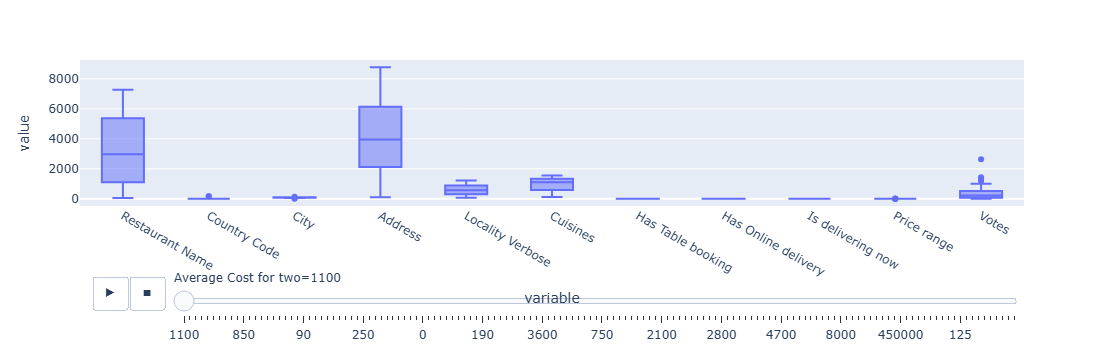

In [180]:
y=px.box(df,animation_frame='Average Cost for two')
y

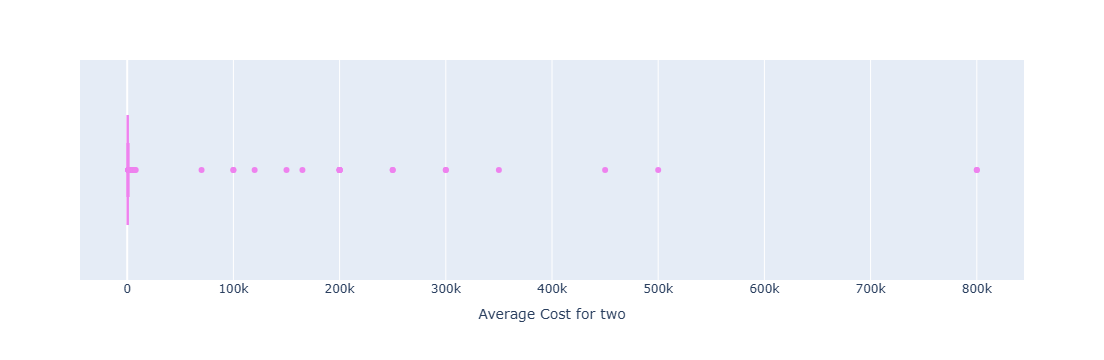

In [186]:
px.box(df,x='Average Cost for two',color_discrete_sequence=['violet'])

In [189]:
df.head(5)

Restaurant Name  Country Code  City  Address  Locality Verbose  Cuisines  \
0             3750           162    74     8688               176       920   
1             3174           162    74     6057               605      1111   
2             2899           162    76     4686               318      1671   
3             4708           162    76     8693               879      1126   
4             5524           162    76     8692               879      1122   

   Average Cost for two  Has Table booking  Has Online delivery  \
0                  1100                  1                    0   
1                  1200                  1                    0   
2                  4000                  1                    0   
3                  1500                  0                    0   
4                  1500                  1                    0   

   Is delivering now  Price range  Votes  
0                  0            3    314  
1                  0            3    591  
2                  0            4    270  
3                  0            4    365  
4                  0            4    229

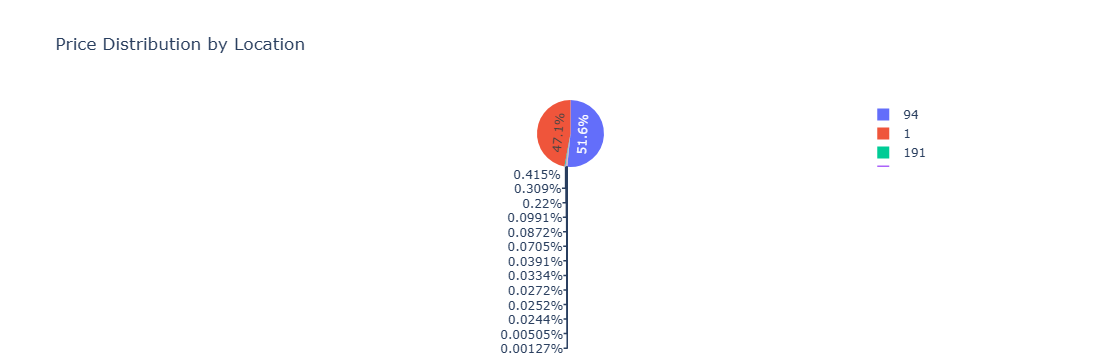

In [191]:
aggregated_df = df.groupby('Country Code', as_index=False).agg({'Average Cost for two': 'sum'})
fig = px.pie(aggregated_df, names='Country Code', values='Average Cost for two', title='Price Distribution by Location')
fig.show()

In [192]:
df.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality Verbose', 'Cuisines', 'Average Cost for two',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Price range', 'Votes'],
      dtype='object')

In [193]:
def remove(df,threshold=3):
    x=df.copy()
    for i in x.select_dtypes(include=['int64','float64']).columns:
        Q1=x[i].quantile(0.25)
        Q3=x[i].quantile(0.75)
        IQR=Q3-Q1
        lb=Q1-threshold*(IQR)
        ub=Q3+threshold*(IQR)
        x=x[(x[i]>=lb) & (x[i]<=ub)]
    return x

In [194]:
r=remove(df)
r

Restaurant Name  Country Code  City  Address  Locality Verbose  \
2560             2403             1    89     3453                 8   
2561             1040             1    89     2942                13   
2563             2065             1    89     2702                13   
2565             4129             1    89     3180                13   
2566             5605             1    89     2981                13   
...               ...           ...   ...      ...               ...   
8028             4311             1    89     3881              1262   
8029             5442             1    89      771              1262   
8030             6111             1    89     2544              1262   
8031             6777             1    89     3063              1262   
8032             7403             1    89     5802              1262   

      Cuisines  Average Cost for two  Has Table booking  Has Online delivery  \
2560       757                   500                  0                    0   
2561       828                   350                  0                    1   
2563      1722                   500                  0                    0   
2565      1275                   400                  0                    0   
2566       828                   400                  0                    1   
...        ...                   ...                ...                  ...   
8028      1180                   250                  0                    0   
8029       497                   350                  0                    0   
8030      1275                   250                  0                    0   
8031      1306                   250                  0                    0   
8032       163                   800                  0                    0   

      Is delivering now  Price range  Votes  
2560                  0            2      2  
2561                  0            1     46  
2563                  0            2     11  
2565                  0            1      8  
2566                  0            1     64  
...                 ...          ...    ...  
8028                  0            1      0  
8029                  0            1      0  
8030                  0            1      0  
8031                  0            1      1  
8032                  0            2      1  

[4381 rows x 12 columns]

In [258]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score

In [197]:
x=r.drop('Average Cost for two',axis=1)
x

Restaurant Name  Country Code  City  Address  Locality Verbose  \
2560             2403             1    89     3453                 8   
2561             1040             1    89     2942                13   
2563             2065             1    89     2702                13   
2565             4129             1    89     3180                13   
2566             5605             1    89     2981                13   
...               ...           ...   ...      ...               ...   
8028             4311             1    89     3881              1262   
8029             5442             1    89      771              1262   
8030             6111             1    89     2544              1262   
8031             6777             1    89     3063              1262   
8032             7403             1    89     5802              1262   

      Cuisines  Has Table booking  Has Online delivery  Is delivering now  \
2560       757                  0                    0                  0   
2561       828                  0                    1                  0   
2563      1722                  0                    0                  0   
2565      1275                  0                    0                  0   
2566       828                  0                    1                  0   
...        ...                ...                  ...                ...   
8028      1180                  0                    0                  0   
8029       497                  0                    0                  0   
8030      1275                  0                    0                  0   
8031      1306                  0                    0                  0   
8032       163                  0                    0                  0   

      Price range  Votes  
2560            2      2  
2561            1     46  
2563            2     11  
2565            1      8  
2566            1     64  
...           ...    ...  
8028            1      0  
8029            1      0  
8030            1      0  
8031            1      1  
8032            2      1  

[4381 rows x 11 columns]

In [198]:
y=r['Average Cost for two']
y

2560    500
2561    350
2563    500
2565    400
2566    400
       ... 
8028    250
8029    350
8030    250
8031    250
8032    800
Name: Average Cost for two, Length: 4381, dtype: int64

In [239]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [269]:
model=LinearRegression()
model

LinearRegression()

In [270]:
model.fit(x_train,y_train)

LinearRegression()

In [271]:
pred=model.predict(x_test)

In [272]:
error=mean_squared_error(y_test,pred)
score=r2_score(y_test,pred)
print(error)
print(score)

11804.355921742386
0.7485418725752605


In [273]:
from sklearn.metrics import root_mean_squared_error

In [274]:
error= root_mean_squared_error(y_test,pred)
error

np.float64(108.6478528169903)

In [275]:
#Check out which feature is important by considering coefficients  regression
#classifiction --> feature importance

In [276]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [277]:

]#pip install matplotlib

In [248]:
import pickle

In [249]:
with open('hack.pkl','wb') as f:
    pickle.dump(model,f)

In [250]:
pred_m=pickle.load(open('hack.pkl','rb'))

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Restaurant Name       9551 non-null   int64
 1   Country Code          9551 non-null   int64
 2   City                  9551 non-null   int64
 3   Address               9551 non-null   int64
 4   Locality Verbose      9551 non-null   int64
 5   Cuisines              9551 non-null   int64
 6   Average Cost for two  9551 non-null   int64
 7   Has Table booking     9551 non-null   int64
 8   Has Online delivery   9551 non-null   int64
 9   Is delivering now     9551 non-null   int64
 10  Price range           9551 non-null   int64
 11  Votes                 9551 non-null   int64
dtypes: int64(12)
memory usage: 895.5 KB
